In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#To ignore warning messages
import warnings
warnings.filterwarnings('ignore')

# Do the following in the iris dataset

## 1. Read the dataset to python environment

In [2]:
#Read the dataset to python environment
df=pd.read_excel('iris_n.xls')

## 2. Do the necessary pre-processing steps


### Descriptive analysis of the dataset:

In [3]:
#Check data accuracy using head and tail function
df.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,SL,SW,PL,PW,Classification
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Data looks fine without any inaccuracy but we can see some missing value presence in the form as NaN which we need to look into further.

In [5]:
#Checking dimensions
df.shape

(150, 5)

In [6]:
#Checking  statistical summary
pd.set_option('display.max_columns', None)
df.describe().style.background_gradient(cmap =sns.cubehelix_palette(as_cmap=True))

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


There are missing values as count is not 150 for all attributes. Hence, we need to fill in those. Min and max values of each feature looks good so we might not need scaling.

In [7]:
#Lets check the datatype of each features
df.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

Data types of all independent features has been inferred as float64.So there is no need for any convertion.

In [8]:
#Checking the percentage of  null values in each columns
df.isnull().sum()/df.shape[0]*100

SL                4.666667
SW                4.000000
PL                4.000000
PW                0.000000
Classification    0.000000
dtype: float64

SL,SW and PL has missing values which we need to fill.

In [9]:
#Checking unique values in target columns and their counts.
df['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

Our target column Classification has 3 labels(3 different classfications of Iris-Flower) with equal number of data.

### Exploratory data analysis and further preprocessing

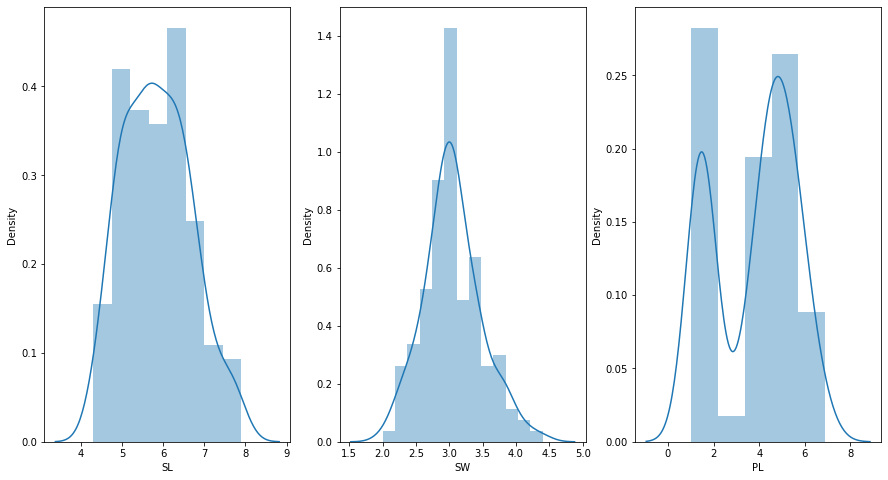

In [10]:
#Lets check the distribution to decide whether mean or median to use to fill the missing values.
fig=plt.subplots(figsize=(15,8))    
plt.subplot(1,3,1)
sns.distplot(df['SL'])
plt.subplot(1,3,2)
sns.distplot(df['SW'])
plt.subplot(1,3,3)
sns.distplot(df['PL'])
plt.show()

In [11]:
#Lets start filling for SL and PL column with median as both does not have a normal distribution

In [12]:
print('Number of null values in SL column: ', df['SL'].isnull().sum())
print('Number of null values in PL column: ', df['PL'].isnull().sum())

Number of null values in SL column:  7
Number of null values in PL column:  6


In [13]:
# Lets fill SL and PL with their median.
df['SL']=df['SL'].fillna(df['SL'].median())

df.isnull().sum()
print('Number of null values in SL column: ', df['SL'].isnull().sum())

df['PL']=df['PL'].fillna(df['PL'].median())

df.isnull().sum()
print('Number of null values in PL column: ', df['PL'].isnull().sum())

Number of null values in SL column:  0
Number of null values in PL column:  0


 SL and PL has no missing values now.

In [14]:
#Now lets fill in SW with mean value as it has a normal distribution
df['SW']=df['SW'].fillna(df['SW'].mean())

df.isnull().sum()
print('Number of null values in SW column: ', df['SW'].isnull().sum())

Number of null values in SW column:  0


In [15]:
df.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

#### All the missing values are now filled.

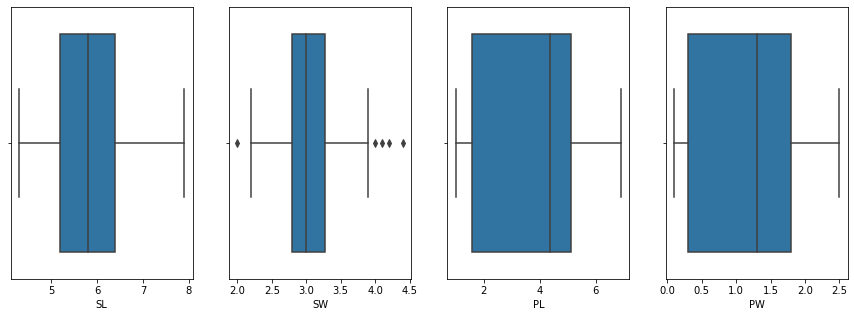

In [16]:
#Lets check for any Outliers in dataset using Boxplot

fig=plt.subplots(figsize=(15,5))
plt.subplot(1,4,1)
sns.boxplot(df['SL'],data=df)
plt.subplot(1,4,2)
sns.boxplot(df['SW'],data=df)
plt.subplot(1,4,3)
sns.boxplot(df['PL'],data=df)
plt.subplot(1,4,4)
sns.boxplot(df['PW'])

plt.show()

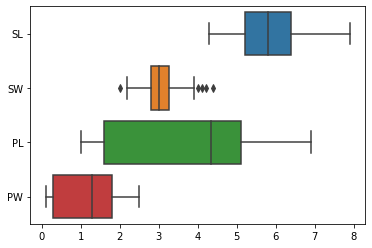

In [17]:
#Plot 2
sns.boxplot(data= df, orient='h')
plt.show()

SW has outliers closer to upper whisker and just below lower whisker.

In [18]:
#Handling outliers in SW using Quantile method

Q1=np.percentile(df['SW'],25,interpolation='midpoint')
Q2=np.percentile(df['SW'],50,interpolation='midpoint')
Q3=np.percentile(df['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [19]:
df['SW'].median()

3.0

In [20]:
IQR= Q3 - Q1
low_lim = Q1 - 1.5* IQR
up_lim = Q3 + 1.5 * IQR
print("IQR is : ",IQR)
print("Lower Limit is :",low_lim)
print("Upper limit is: ",up_lim)

IQR is :  0.4500000000000002
Lower Limit is : 2.1249999999999996
Upper limit is:  3.9250000000000003


In [21]:
df[(df['SW'] > 3.93) ^ (df['SW'] < 2.12)]

,SL,SW,PL,PW,Classification
14,5.8,4.0,1.2,0.2,Iris-setosa
15,5.7,4.4,1.5,0.4,Iris-setosa
32,5.2,4.1,1.5,0.1,Iris-setosa
33,5.5,4.2,1.4,0.2,Iris-setosa
60,5.0,2.0,3.5,1.0,Iris-versicolor


In [22]:
#We can drop those indexes from our data if we want
#df=df.drop([14, 15, 32, 33,60])
#But we dont have to drop as data is very small.

### EDA in detail

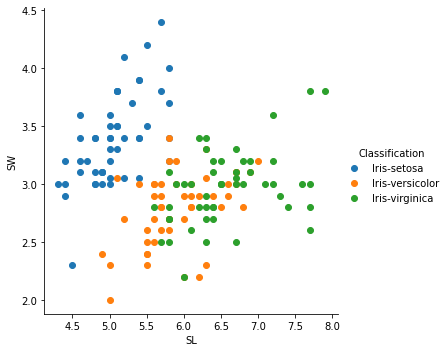

In [23]:
# We can use seaborn's FacetGrid to color the scatterplot by species to learn more about its distribution in dataset

#For Sw and SL
sns.FacetGrid(df, hue='Classification', size=5) \
   .map(plt.scatter, "SL", "SW") \
   .add_legend()

Iris setosa with smaller Sepal length but higher Sepal width.Iris-Virginica has larger sepal lengths and smaller sepal widths.Iris-Versicolor lies in almost middle for length as well as width.

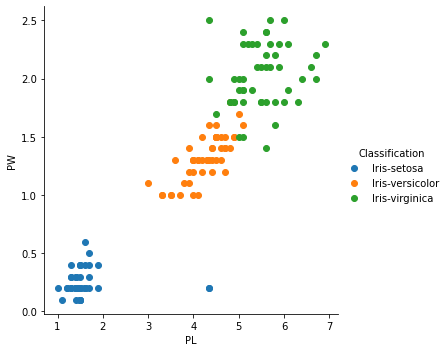

In [24]:
# For PL and PW
sns.FacetGrid(df, hue='Classification', size=5) \
   .map(plt.scatter, "PL", "PW") \
   .add_legend()

Iris-Setosa species have the smallest petal length as well as petal width.
Iris-Versicolor species have average petal length and petal width.
Iris-Virginica species have the highest petal length as well as petal width.

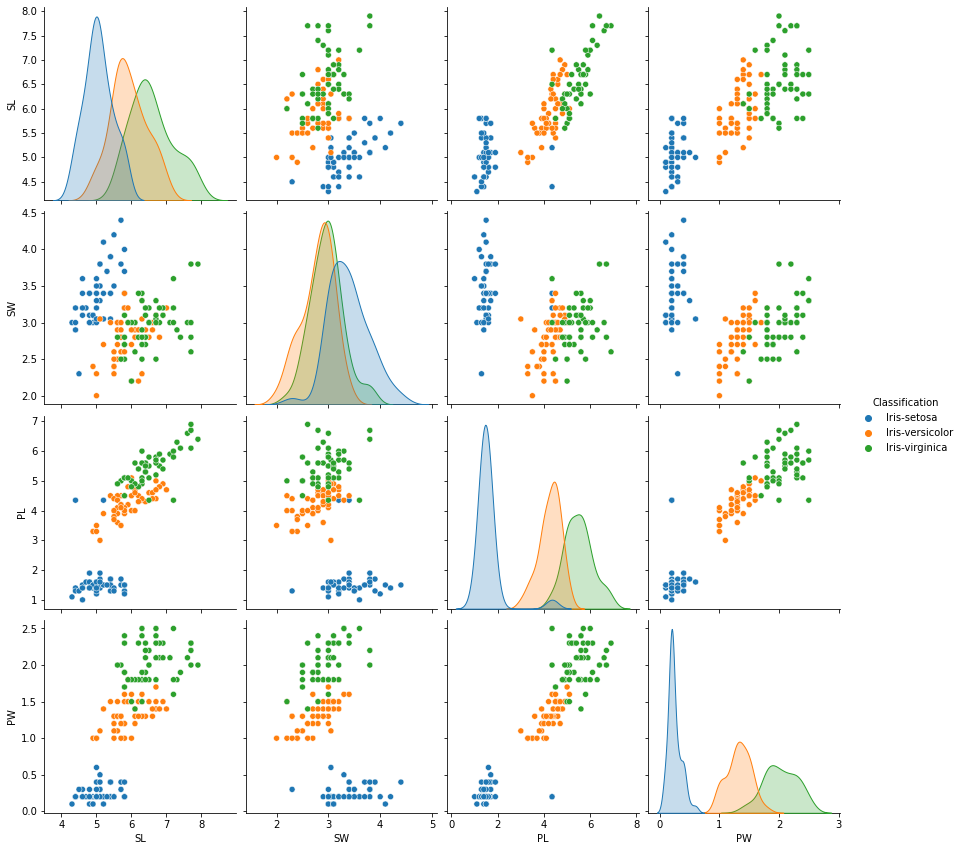

In [25]:
#Pairplot visualization of  given data to find the relationship between variables 
#and it provides a high-level interface for drawing attractive and informative statistical graphics.
sns.pairplot(df,hue="Classification", size=3)

From the pairplot, it is clear  that the Iris-setosa classification  is separataed from the other
two across all feature combinations.

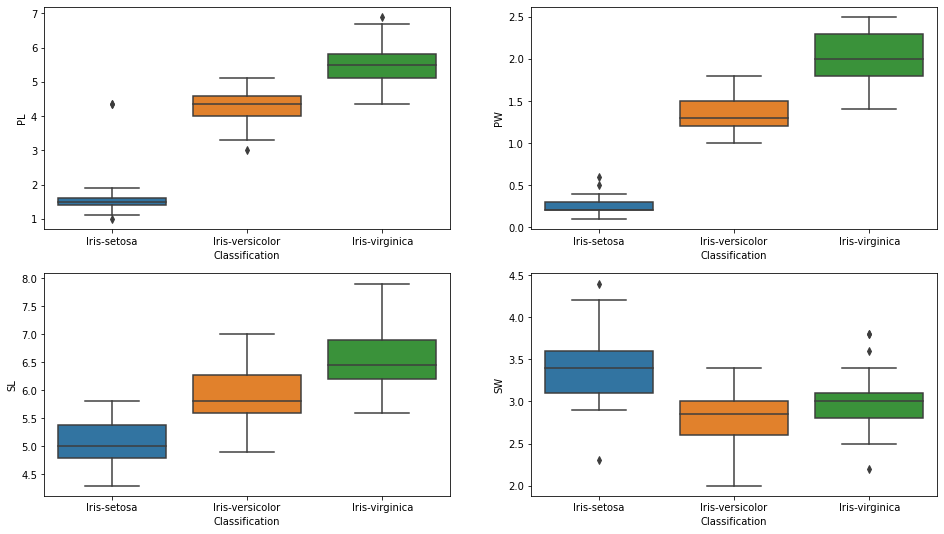

In [26]:
#Boxplot to compare multiple distribution at a glance.
fig, axes = plt.subplots(2, 2, figsize=(16,9))
sns.boxplot( y='PL', x= 'Classification', data=df, orient='v' , ax=axes[0, 0])
sns.boxplot( y='PW', x= 'Classification', data=df, orient='v' , ax=axes[0, 1])
sns.boxplot( y='SL', x= 'Classification', data=df, orient='v' , ax=axes[1, 0])
sns.boxplot( y='SW', x= 'Classification', data=df, orient='v' , ax=axes[1, 1])
plt.show()

Iris-Setosa is having smaller feature and is distributed less.
Iris-Versicolor is distributed in an average manner and average features.
Iris-Virginica is highly distributed with large number of values and features.

<AxesSubplot:>

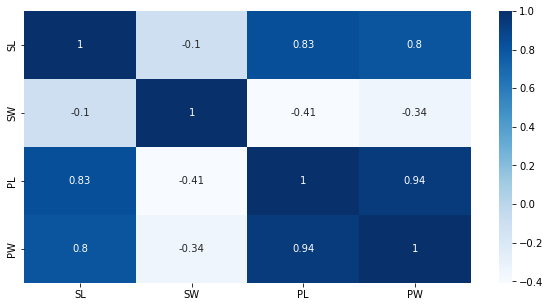

In [27]:
#Lets check the correlation 
cor=df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(cor,annot=True,cmap='Blues')

Highest correlation value is 0.94(PL & PW)  &
  Lowest correlation value is -0.41(SW & PW)

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64


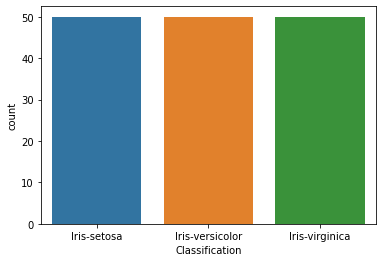

In [28]:
# visualization of  unique values and their counts in Classification column(Target)
sns.countplot(df["Classification"])
print(df.Classification.value_counts())

#### Encoding Classification column using Label Encoder

In [29]:
#import necessary library for label encoding target which is Classification column.
from sklearn.preprocessing import LabelEncoder

In [30]:
#creating an instance
le=LabelEncoder()

In [31]:
#Fit and transform to numeric
df['Classification']=le.fit_transform(df['Classification'])

0    50
1    50
2    50
Name: Classification, dtype: int64


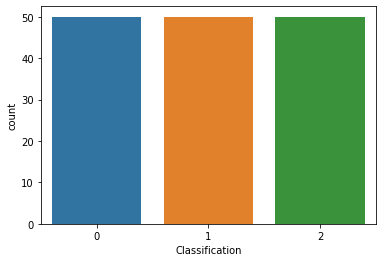

In [32]:
#Classification is now changed to 0,1 and 2.We can visualise it.
sns.countplot(df["Classification"])
print(df.Classification.value_counts())

#### Iris-setosa = 0, Iris-versicolor = 1, Iris-virginica = 2

## 3. Find out which classification model gives the best result (also do random forest algorithm)

## Split the dataset

In [33]:
#Lets split the dataset to X and y variable
#In X independent features and y with Traget
X=df.drop('Classification',axis=1)
y=df['Classification']

In [34]:
#Now lets split the data for traning and testing set for model building
#Import necessary libraries for it
from sklearn.model_selection import train_test_split

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Model Building

## Model 1- Logistic Regression

In [36]:
#Import necessary libraries for Logistic Regression and also evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,classification_report,f1_score

In [37]:
# creating instance for Logistic Regression
lr= LogisticRegression()

#Fitting the model
lr.fit(X_train, y_train)

#Predicting
y_pred_lr = lr.predict(X_test)


#### Evaluation

In [38]:
 
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 15.0, 'Predicted label')

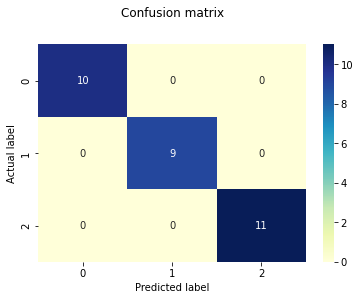

In [39]:
#Confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_lr)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [40]:
print("Precision :",precision_score(y_test,y_pred_lr,average = 'weighted'))
print("Recall :",recall_score(y_test,y_pred_lr,average = 'weighted'))
print("F1 Score :",f1_score(y_test,y_pred_lr,average = 'weighted'))

Precision : 1.0
Recall : 1.0
F1 Score : 1.0


In [41]:
# Accuracy score

print('The accuracy of logistic regression is',accuracy_score(y_test,y_pred_lr))

The accuracy of logistic regression is 1.0


## Model 2 K – Nearest Neighbor (KNN) Classification

In [42]:
#Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier

In [43]:
#Finding the best K value for kNN 

metric_k=[]  
neighbors=range(1,20)  

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(X_train,y_train)
    pred_kNN=classifier.predict(X_test)
    acc=accuracy_score(y_test,pred_kNN) 
    metric_k.append(acc) 

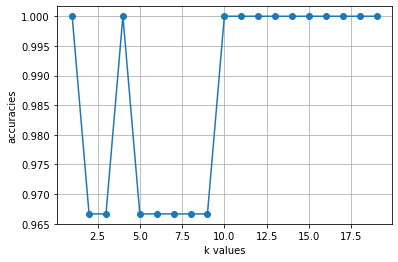

In [44]:
#we can plot it to find the  k value that gives best accuracy 

plt.plot(neighbors,metric_k,'o-')  
plt.xlabel('k values')
plt.ylabel('accuracies')
plt.grid() 

In [45]:
#There are many values which can be considere as k value as many gives same accuracy
#Lets take k as 15 here

#Creating an instance
knn=KNeighborsClassifier(n_neighbors=15)
#Fit the model
knn.fit(X_train,y_train)

#Prediction
y_pred_knn=knn.predict(X_test)


#### Evaluation

In [46]:
 
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 15.0, 'Predicted label')

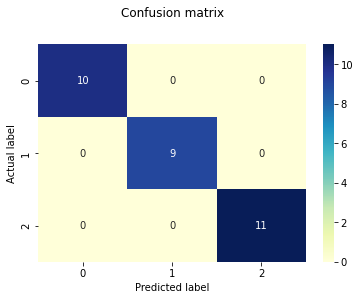

In [47]:
#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_knn)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [48]:
print("Precision :",precision_score(y_test,y_pred_knn,average = 'weighted'))
print("Recall :",recall_score(y_test,y_pred_knn,average = 'weighted'))
print("F1 Score :",f1_score(y_test,y_pred_knn,average = 'weighted'))

Precision : 1.0
Recall : 1.0
F1 Score : 1.0


In [49]:
# Accuracy score

print('The accuracy of kNN model is',accuracy_score(y_test,y_pred_knn))

The accuracy of kNN model is 1.0


## Method 3-Decision tree classifier

In [50]:
#Import mecessary libraries for Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

#Create and instance
dt=DecisionTreeClassifier(max_depth=4)

#Fit the model and do prediction
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)


#### Evaluation 

In [51]:

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 15.0, 'Predicted label')

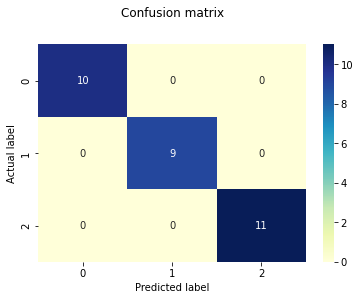

In [52]:
#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_dt)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [53]:
print("Precision :",precision_score(y_test,y_pred_dt,average = 'weighted'))
print("Recall :",recall_score(y_test,y_pred_dt,average = 'weighted'))
print("F1 Score :",f1_score(y_test,y_pred_dt,average = 'weighted'))

Precision : 1.0
Recall : 1.0
F1 Score : 1.0


In [54]:
# Accuracy score evaluation

print('The accuracy of Decision Tree Classifier is',accuracy_score(y_test,y_pred_dt))

The accuracy of Decision Tree Classifier is 1.0


## Method 4 Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100)

#Fit the model
rf.fit(X_train,y_train)

#Prediction
y_pred_rf=rf.predict(X_test)


#### Evaluation 

In [56]:

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 15.0, 'Predicted label')

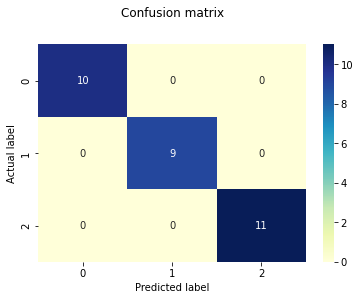

In [57]:
#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_rf)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [58]:
print("Precision :",precision_score(y_test,y_pred_rf,average = 'weighted'))
print("Recall :",recall_score(y_test,y_pred_rf,average = 'weighted'))
print("F1 Score :",f1_score(y_test,y_pred_rf,average = 'weighted'))

Precision : 1.0
Recall : 1.0
F1 Score : 1.0


In [59]:
# Accuracy score evaluation
from sklearn.metrics import accuracy_score
print('The accuracy of Random Forest Classifier is',accuracy_score(y_test,y_pred_rf))

The accuracy of Random Forest Classifier is 1.0


## Method 5 Support Vector Machine Model of Classification (SVC)

In [60]:
#Import necessary libraries
from sklearn import svm 
from sklearn.svm import SVC

### SVC Model with Kernal as Linear

In [61]:
#Creating an instance
svm_linear=SVC(kernel='linear')

#Fitting the model
svm_linear.fit(X_train,y_train)

#Predicting
y_pred_svm1=svm_linear.predict(X_test)

#### Evaluation

In [62]:
 
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_svm1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 15.0, 'Predicted label')

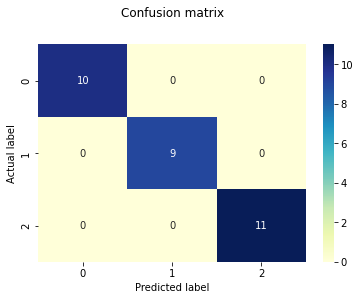

In [63]:
#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm1)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [64]:
print("Precision :",precision_score(y_test,y_pred_svm1,average = 'weighted'))
print("Recall :",recall_score(y_test,y_pred_svm1,average = 'weighted'))
print("F1 Score :",f1_score(y_test,y_pred_svm1,average = 'weighted'))

Precision : 1.0
Recall : 1.0
F1 Score : 1.0


In [65]:
# Accuracy score evaluation

print('The accuracy of Support vector machine using linear kernal is',accuracy_score(y_test,y_pred_svm1))

The accuracy of Support vector machine using linear kernal is 1.0


### SVC Model with Kernal as RBF(Radial Basis Function)

In [66]:
#creating an instance
svm_rbf=SVC(kernel='rbf')

#Fitting the model
svm_rbf.fit(X_train,y_train)

#Prediction
y_pred_svm2=svm_rbf.predict(X_test)

#### Evaluation 

In [67]:

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred_svm2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Text(0.5, 15.0, 'Predicted label')

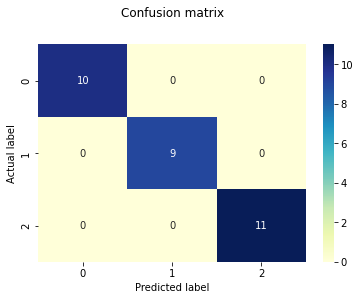

In [68]:
#Confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_svm2)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [69]:
print("Precision :",precision_score(y_test,y_pred_svm2,average = 'weighted'))
print("Recall :",recall_score(y_test,y_pred_svm2,average = 'weighted'))
print("F1 Score :",f1_score(y_test,y_pred_svm2,average = 'weighted'))

Precision : 1.0
Recall : 1.0
F1 Score : 1.0


In [70]:
# Accuracy score evaluation
print('The accuracy of SVM rbf is',accuracy_score(y_test,y_pred_svm2))

The accuracy of SVM rbf is 1.0


# Comparison of Accuracy of each models

In [71]:
print('The accuracy of Logistic regression is',accuracy_score(y_test,y_pred_lr))
print('The accuracy of kNN model is',accuracy_score(y_test,y_pred_knn))
print('The accuracy of Decision Tree Classifier is',accuracy_score(y_test,y_pred_dt))
print('The accuracy of Random Forest Classifier is',accuracy_score(y_test,y_pred_rf))
print('The accuracy of Support vector machine classifier  using linear kernal is',accuracy_score(y_test,y_pred_svm1))
print('The accuracy of Support vector machine classifier usning rbf kernal  is',accuracy_score(y_test,y_pred_svm2))

The accuracy of Logistic regression is 1.0
The accuracy of kNN model is 1.0
The accuracy of Decision Tree Classifier is 1.0
The accuracy of Random Forest Classifier is 1.0
The accuracy of Support vector machine classifier  using linear kernal is 1.0
The accuracy of Support vector machine classifier usning rbf kernal  is 1.0


#### All  the models shows 100% accuracy .
There could be many reasons for this like overfitting.
The train_test_split() splits the dataset into training_test and test_set by random splitting so there can be chances of some biased result as it is based on only particular test set so we can validate it using Cross validation.

# Cross validation

Cross-validation accuracy is used as a performance metric to compare the efficiency of different models. The k-fold cross-validation technique generally produces less biased models as every data point from the original dataset will appear in both the training and testing set.

### Method 1

In [72]:
#Import necessary libraries
from sklearn.model_selection import cross_validate

In [73]:
#For Logistic Regression
cvs_lr=cross_validate(lr,X,y,cv=10)
print('The cv score for Logistic regression model is',cvs_lr['test_score'].mean())
#For kNN
cvs_knn=cross_validate(knn,X,y,cv=10)
print('The cv score for kNN  model is',cvs_knn['test_score'].mean())
#For Decision Tree
cvs_dt=cross_validate(dt,X,y,cv=10)
print('The cv score for Decision Tree Classifier is',cvs_dt['test_score'].mean())
#For Random Forest Classifier
cvs_rf=cross_validate(rf,X,y,cv=10)
print('The cv score for Random Forest Classifier is',cvs_rf['test_score'].mean())
#For SVM classifier
cvs_svm_linear=cross_validate(svm_linear,X,y,cv=10)
print('The cv score for Support vector machine Classifier (linear) is',cvs_svm_linear['test_score'].mean())
cvs_svm_rbf=cross_validate(svm_rbf,X,y,cv=10)
print('The cv score for Support vector machine Classifier (rbf) is',cvs_svm_rbf['test_score'].mean())

The cv score for Logistic regression model is 0.9466666666666667
The cv score for kNN  model is 0.96
The cv score for Decision Tree Classifier is 0.9533333333333334
The cv score for Random Forest Classifier is 0.9666666666666666
The cv score for Support vector machine Classifier (linear) is 0.9533333333333334
The cv score for Support vector machine Classifier (rbf) is 0.9466666666666667


### Method 2- StratifiedKFold 

In [74]:
#Taking function for score

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [75]:
#Importing StratifiedKFold for cross validation with fold as 5

from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=5)

In [76]:
#The steps to store those score values in each models
score_lr = []
score_knn = []
score_dt = []
score_rf = []
score_svm = []
for train_index, test_index in folds.split(X,y):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    score_lr.append(get_score(LogisticRegression(), X_train, X_test, y_train, y_test))
    score_knn.append(get_score(KNeighborsClassifier(), X_train, X_test, y_train, y_test))
    score_dt.append(get_score(DecisionTreeClassifier(), X_train, X_test, y_train, y_test))
    score_rf.append(get_score(RandomForestClassifier(), X_train, X_test, y_train, y_test))
    score_svm.append(get_score(SVC(), X_train, X_test, y_train, y_test))

#### Find the mean score of each model to evaluate

In [77]:
#Import mean score from statistics for it

from statistics import mean

In [78]:
#Finding the mean of those cross validates scores 
lr_mean_score = mean(score_lr)
knn_mean_score = mean(score_knn)
dt_mean_score = mean(score_dt)
rf_mean_score = mean(score_rf)
svm_mean_score = mean(score_svm)

In [79]:
print('The Score for LogisticRgression model is', lr_mean_score.round(2))
print('The Score for KNeighbors model is', knn_mean_score.round(2))
print('The Score for DecisionTree model is', dt_mean_score.round(2))
print('The Score for RandomForest model is', rf_mean_score.round(2))
print('The Score for SVM model is', svm_mean_score.round(2))

The Score for LogisticRgression model is 0.95
The Score for KNeighbors model is 0.97
The Score for DecisionTree model is 0.94
The Score for RandomForest model is 0.97
The Score for SVM model is 0.94


### From the cross validation by both ways, K nearest neighbors  and Random Forest classifier model gives a better score than other Logistic Regression,Decision Tree and SVM models. So we can conclude K Nearest Neighbors and Random Forest are best models for the given dataset.
